<a href="https://www.kaggle.com/code/sjagkoo7/eda-of-ipl-matches-am?scriptVersionId=132206124" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ipldata/matches.csv
/kaggle/input/ipldata/deliveries.csv


# Reference
- https://jovian.ai/pratham-10/eda-of-ipl
- https://towardsdatascience.com/exploratory-data-analysis-of-ipl-matches-part-1-c3555b15edbb
- https://towardsdatascience.com/analysing-ipl-data-to-begin-data-analytics-with-python-5d2f610126a

# Read the match and balling

In [2]:
ball=pd.read_csv('/kaggle/input/ipldata/deliveries.csv')
#matches=pd.read_csv('/kaggle/input/ipldata/matches.csv',index_col='id')
matches=pd.read_csv('/kaggle/input/ipldata/matches.csv')

# Pre-processing

In [3]:
# ball.head(5)
#matches.head(5)
#ball.info()
# matches.info()
# ball.describe()
# matches.describe()
#ball.isna().sum()
matches.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

# Data Cleaning

- checking every feature one by one. So here `City` and `team` need to work on.

#### Dealing with City

In [4]:
#matches.loc[matches.city.isna()]
matches[matches.city.isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


- All of mathces has been played in **Dubai International Cricket Stadium** so City will be **Dubai**.

In [5]:
matches.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [6]:
matches[matches.city == 'Abu Dhabi']

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
457,458,2014,Abu Dhabi,2014-04-16,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,41,0,JH Kallis,Sheikh Zayed Stadium,M Erasmus,RK Illingworth,NaN
459,460,2014,Abu Dhabi,2014-04-18,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Sheikh Zayed Stadium,RK Illingworth,C Shamshuddin,NaN
460,461,2014,Abu Dhabi,2014-04-18,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,AM Rahane,Sheikh Zayed Stadium,BF Bowden,RK Illingworth,NaN
464,465,2014,Abu Dhabi,2014-04-21,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,normal,0,Chennai Super Kings,93,0,SK Raina,Sheikh Zayed Stadium,RK Illingworth,C Shamshuddin,NaN
470,471,2014,Abu Dhabi,2014-04-26,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,6,PV Tambe,Sheikh Zayed Stadium,HDPK Dharmasena,C Shamshuddin,NaN
471,472,2014,Abu Dhabi,2014-04-26,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kings XI Punjab,23,0,Sandeep Sharma,Sheikh Zayed Stadium,HDPK Dharmasena,RK Illingworth,NaN
475,476,2014,Abu Dhabi,2014-04-29,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary,NaN


In [7]:
def changes_city(matches):
    matches['city'].replace(to_replace='Bengaluru',value='Bangalore',inplace=True)
    matches['city'].fillna('Dubai',inplace=True)
#     for idx in matches[matches.city.isna()].index:
#         if(matches.loc[idx,'venue']=='Dubai International Cricket Stadium'):
#             matches.loc[idx,'city'] = 'Dubai'

changes_city(matches)

In [8]:
   matches.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali'], dtype=object)

In [9]:
#matches.loc[matches.winner.isna()]
matches[matches.winner.isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bangalore,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


#### Dealing with team name

In [10]:
matches.team1.unique()
#matches.team1.value_counts()


array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

- here `Rising Pune Supergiants` `Pune Warriors and Rising Pune Supergiant` and `Delhi Daredevils  Delhi Capitals` same team with different name.

In [11]:
matches.replace(to_replace=['Rising Pune Supergiant','Pune Warriors'],value='Rising Pune Supergiants',inplace=True)
matches.replace(to_replace='Delhi Daredevils',value='Delhi Capitals',inplace=True)

In [12]:
matches.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

# Feature Engineering

#### dealing with umpire3 having highest null values
- we have no use of umpire3 so will drop the umpire3 column

In [13]:
matches.drop(columns='umpire3',axis=1,inplace=True)

In [14]:
matches.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64

# Now , Exploratory Data Analysis and Visualization

#### Q1.How many matches we’ve got in the dataset?

- means how many rows present in matches dataset

In [15]:
#len(matches.index)
#matches.shape[0]
len(matches)

756

- No.of columns present in the dataset

In [16]:
len(matches.columns)

17

#### Q2. How many seasons we’ve got in the dataset?


In [17]:
len(matches.season.unique())

12

#### Q3.The most successful IPL team


#### Similar Questions
- Which are the cities where IPL matches has been played??
- The venue that hosted the maximum number of matches
- The team that won the most number of toss

In [18]:
data=matches['winner'].value_counts().reset_index()
data.columns=['team','no_of_time_won']
data
#data=matches['winner'].value_counts()
#type(data)
# team_wins_df=pd.DataFrame(columns=["team","wins"])
# for items in data.iteritems():
#     temp=pd.DataFrame({'team':[items[0]],'wins':[items[1]]})
#     team_wins_df=team_wins_df.append(temp,ignore_index=True)
# team_wins_df

,team,no_of_time_won
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Delhi Capitals,77
6,Rajasthan Royals,75
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Rising Pune Supergiants,27


In [19]:
data.iloc[0]
#team_wins_df.iloc[0]

team              Mumbai Indians
no_of_time_won               109
Name: 0, dtype: object

<AxesSubplot:title={'center':'The most successful IPL team'}, xlabel='no_of_time_won', ylabel='team'>

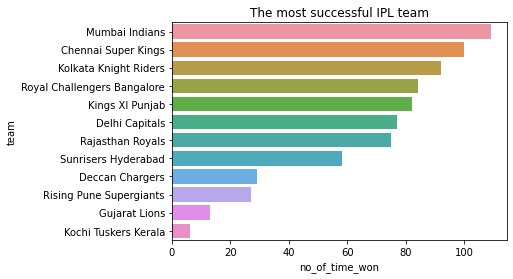

In [20]:
#sns.barplot(x=data,y=data.index,orient='h')
plt.title('The most successful IPL team')
sns.barplot(x=data['no_of_time_won'],y=data['team'])
#sns.barplot(x=team_wins_df['wins'],y=team_wins_df['team'])
#sns.barplot(x='wins',y='team',data=team_wins_df)
# sns.countplot(x='winner',data=matches)
# plt.xticks(rotation=90)

#### Q4.Which season had most number of matches?

In [21]:
#no_of_matches=matches.season.value_counts().reset_index()
no_of_matches=matches.groupby('season').id.count().reset_index()
no_of_matches.columns=['season','total_matches']
no_of_matches
# no_of_matches=matches.season.value_counts()
# no_of_matches_df=pd.DataFrame(columns=['season','total_matches'])
# for items in no_of_matches.iteritems():
#     temp=pd.DataFrame({'season':[items[0]],'total_matches':[items[1]]})
#     no_of_matches_df=no_of_matches_df.append(temp,ignore_index=True)
# no_of_matches_df

,season,total_matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


<AxesSubplot:xlabel='season', ylabel='count'>

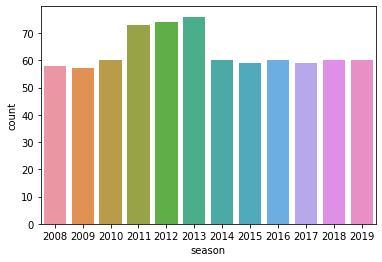

In [22]:
sns.countplot(x='season',data=matches)
#sns.barplot(x=no_of_matches.index,y=no_of_matches)

#### Q5. The team with the most number of wins per season.


In [23]:
win_per_season = matches.groupby('season').winner.value_counts()
win_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Capitals                  7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [24]:
win_per_season_df=pd.DataFrame(columns=['season','team','no_of_time_won'])
year=2008
for items in win_per_season.iteritems():
    if(items[0][0]==year):
        print(items)
        temp=pd.DataFrame({'season':[items[0][0]],'team':[items[0][1]],'no_of_time_won':[items[1]]})
        win_per_season_df=win_per_season_df.append(temp,ignore_index=True)
        year=year+1


((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Capitals'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


In [25]:
win_per_season_df

,season,team,no_of_time_won
0,2008,Rajasthan Royals,13
1,2009,Delhi Capitals,10
2,2010,Mumbai Indians,11
3,2011,Chennai Super Kings,11
4,2012,Kolkata Knight Riders,12
5,2013,Mumbai Indians,13
6,2014,Kings XI Punjab,12
7,2015,Chennai Super Kings,10
8,2016,Sunrisers Hyderabad,11
9,2017,Mumbai Indians,12


#### Q6. Which Team had won by maximum runs?

#### Similar Questions
- Which Team had won by closest Margin (minimum runs)?
- Which Team had won by maximum wicket?
- Which Team had won by minimum wicket?

In [26]:
team_won_max_run=matches.groupby('winner').win_by_runs.value_counts()
team_won_max_run

winner               win_by_runs
Chennai Super Kings  0              48
                     13              3
                     18              3
                     24              3
                     38              3
                                    ..
Sunrisers Hyderabad  35              1
                     45              1
                     48              1
                     85              1
                     118             1
Name: win_by_runs, Length: 271, dtype: int64

In [27]:
matches.iloc[matches['win_by_runs'].idxmax()] 

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2                Delhi Capitals
toss_winner          Delhi Capitals
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object

In [28]:
matches.iloc[matches['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

#### Q7.Which Team had won by closest Margin (minimum runs)?

In [29]:
matches.groupby('winner').win_by_runs.value_counts()

winner               win_by_runs
Chennai Super Kings  0              48
                     13              3
                     18              3
                     24              3
                     38              3
                                    ..
Sunrisers Hyderabad  35              1
                     45              1
                     48              1
                     85              1
                     118             1
Name: win_by_runs, Length: 271, dtype: int64

- Instead of just getting the minimum score (which always would be 0), we have subsetted the data that has win_by_runs greater than or equal to 1 (there by eliminating the zero-issue).

In [30]:
matches.iloc[matches[matches.win_by_runs.ge(1)].win_by_runs.idxmin()]

id                                                        59
season                                                  2017
city                                               Hyderabad
date                                              2017-05-21
team1                                         Mumbai Indians
team2                                Rising Pune Supergiants
toss_winner                                   Mumbai Indians
toss_decision                                            bat
result                                                normal
dl_applied                                                 0
winner                                        Mumbai Indians
win_by_runs                                                1
win_by_wickets                                             0
player_of_match                                    KH Pandya
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                             NJ Llong
umpire2                 

In [31]:
matches.iloc[matches[matches.win_by_runs.ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

#### Top player of the match Winners


In [32]:
player_of_matches=matches.player_of_match.value_counts()
player_of_matches

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
NV Ojha            1
AC Voges           1
J Theron           1
S Hetmyer          1
Name: player_of_match, Length: 226, dtype: int64

In [33]:
player_of_match_df=pd.DataFrame(columns=['player','no_of_time'])
count=0
for items in player_of_matches.iteritems():
    if (count> 9):
        break
    else :
        temp=pd.DataFrame({'player':[items[0]],'no_of_time':[items[1]]})
        player_of_match_df=player_of_match_df.append(temp,ignore_index=True)
        count=count+1
player_of_match_df

,player,no_of_time
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,MS Dhoni,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


<AxesSubplot:title={'center':'Top Player of  the match'}, xlabel='no_of_time', ylabel='player'>

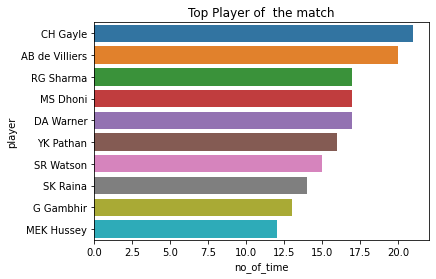

In [34]:
#sns.countplot(x='player_of_match',data=matches)
plt.title('Top Player of  the match')
sns.barplot(x=player_of_match_df['no_of_time'],y=player_of_match_df['player'])